the path : (['Agra', 'Delhi', 'Mumbai'], 1696)


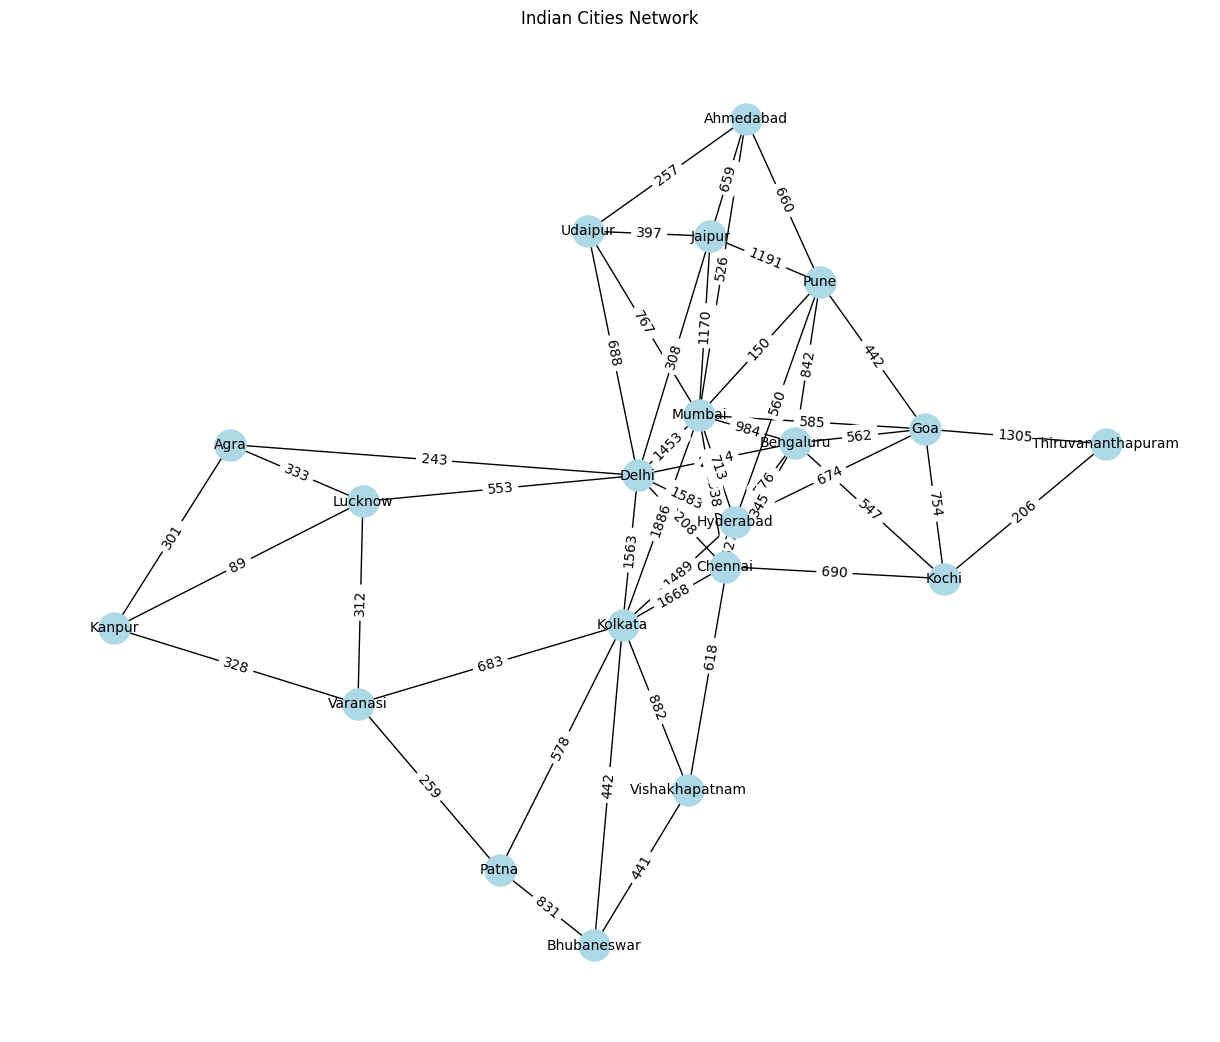

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import queue
import networkx as nx


def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], 0, [start]))  # (f, g, path)

    while not pri_queue.empty():
        f, g, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path, g  # Return path and total cost

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_g = g + graph[current_node][neighbor]['weight']  # Accumulate cost
                new_path = current_path + [neighbor]
                pri_queue.put((new_g + heuristic[neighbor], new_g, new_path))

    return [], float('inf')  # Goal not found


df = pd.read_csv('indian_cities.csv')

G = nx.Graph()

for node in df.iterrows(): 
    G.add_edge(node[1]['Origin'], node[1]['Destination'], weight=node[1]['Distance'])

unique_cities = set(df['Origin'].tolist() + df['Destination'].tolist())
 
pos = nx.spring_layout(G, seed=42)  # for reproducibility

# source = input("Enter a source city: ")
source = "Agra"
destination ="Mumbai"
# destination = input("Enter a destination city: ")

heuristic_table = {city: euclidean_distance(city, destination, pos) for city in unique_cities}
 
path = astar(G, source,destination, heuristic_table)

print("the path :" ,path)

# Preview the graph
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.title("Indian Cities Network")
plt.show()